In [1]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

### Partial least squares regression
### We call this method partial least squares regression, or "PLSR". As in PCA, PLSR is iterative. It first tries to find the vector within the  𝑛 -dimensional space of  𝑋  with the highest covariance with  𝑦 . Then it looks for a second vector, perpendicular to the first, that explains the highest covariance with  𝑦  that remains after accounting for the first vector. This continues for as many components as we permit, up to  𝑛 .

In [2]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

X

array([[ 0.72987978,  1.80891785,  0.50362841, ..., -0.48901819,
        -0.27433792,  1.94167883],
       [ 0.83405168,  0.50151972, -0.58665832, ..., -0.88426622,
         2.08578224, -0.28337559],
       [-0.21842438, -0.8568126 ,  0.14533924, ...,  1.31991771,
        -0.23534127,  0.47101764],
       ..., 
       [ 1.26255628,  1.65975635,  0.29032446, ...,  0.33286759,
        -0.01160764,  2.1607233 ],
       [ 0.15184068,  0.54849221, -0.75183364, ...,  0.49809051,
        -0.11542308,  0.49620852],
       [ 0.39249258, -0.01813668, -0.69332712, ...,  0.67668296,
         1.07646379,  0.83392256]])

In [3]:
# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5

y

array([  7.89679348,   8.44629484,   3.31229206,   8.26730628,
         4.46003968,   7.24550683,   6.34247575,   4.1615445 ,
         6.02947306,   2.32537103,   0.73907497,   7.68111048,
         5.40203073,   0.27988392,   5.6605744 ,   7.8353714 ,
         8.61540816,   8.42496919,   1.2142053 ,   7.47871493,
         1.73786745,   3.52125515,   6.72688916,   4.95883956,
         6.09836119,   9.04041089,   7.80103241,   5.69024308,
         6.20200601,   5.04460906,   4.33438555,   7.07776487,
         2.63636685,   4.5442256 ,   5.13117394,   6.8456052 ,
         4.23476686,   6.03454531,   2.24950354,   5.06233333,
         5.79407042,   4.69613835,   6.57197603,   4.60864017,
         7.25752166,   4.91798302,   8.08827619,   4.33137544,
         6.90083624,   3.75237505,   3.39652879,   5.67895007,
         6.07275001,   3.70779718,   3.25420025,   7.40901203,
        10.79742717,   7.84630818,   6.43290335,   2.39030538,
         5.30470569,   5.84848161,   3.88715931,   5.11

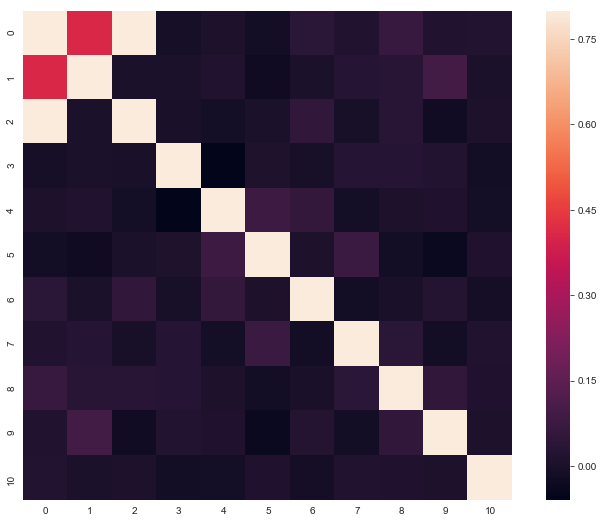

In [4]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Fit a linear model with multiple features, in this case 10.

In [5]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


R-squared regression: 0.834455306244


### Fit a linear model with Partial Least Squares Regression, reducing 10 features to 3, in this example.

In [6]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.834455175152


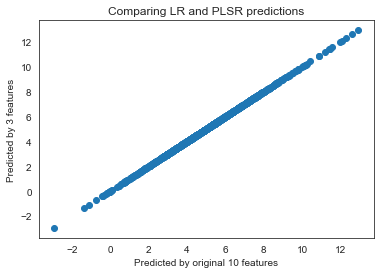

In [7]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

### PLSR will not work as well if features are uncorrelated, or if the only feature correlations are paired (feature 1 is only correlated with feature 2, feature 3 is only correlated with feature 4, etc).

### The trick to successful PLSR is to select the right number of components to keep. Use the cell below to create new partial least square regressions with different numbers of components, then see how those changes affect the ability of your models to reproduce the predicted Y values as well as the regular linear regression. Typically, you would choose your components based on the number that gives the most consistent performance between training and test datasets.

### Since this data is randomly generated, you can also play with it by changing how  𝑦  is computed, then observing how different relationships between  𝑦  and  𝑋  play out in PLSR.

### Fit a linear model with Partial Least Squares Regression, reducing 10 features to 2, in this example.


In [8]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls2 = PLSRegression(n_components=2)

# Reduce X to R(X) and regress on y.
pls2.fit(X, y)

# Save predicted values.
Y_PLS_pred2 = pls2.predict(X)
print('With 2 features down from 10 R-squared PLSR2:', pls2.score(X, y))
print('With 3 features down from 10 R-squared PLSR:', pls1.score(X, y))

With 2 features down from 10 R-squared PLSR2: 0.834432345325
With 3 features down from 10 R-squared PLSR: 0.834455175152


### Fit a linear model with Partial Least Squares Regression, reducing 10 features to 8, in this example.

In [9]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls8 = PLSRegression(n_components=8)

# Reduce X to R(X) and regress on y.
pls8.fit(X, y)

# Save predicted values.
Y_PLS_pred8 = pls8.predict(X)
print('With 8 features down from 10 R-squared PLSR2:', pls8.score(X, y))
print('With 2 features down from 10 R-squared PLSR2:', pls2.score(X, y))
print('With 3 features down from 10 R-squared PLSR:', pls1.score(X, y))

With 8 features down from 10 R-squared PLSR2: 0.834455306244
With 2 features down from 10 R-squared PLSR2: 0.834432345325
With 3 features down from 10 R-squared PLSR: 0.834455175152


### Altering how y is calculated and then applying PLSR to see if the R -squared PLSR changes.

In [10]:
# Create normally distributed outcome related to parameters but with noise.
y_altered = X[:, 0] + 1 * X[:, 1] + np.random.normal(size=n * 1) + 1

y_altered

array([  3.50706432e+00,   2.80477754e+00,   1.47803788e+00,
         8.74659440e-01,   2.41687277e+00,   1.97009345e+00,
        -5.99541065e-01,   1.18816068e+00,  -2.80140130e-01,
        -9.09623838e-01,  -2.01982305e+00,   2.38018186e+00,
         6.09998655e-01,  -1.06259306e+00,   1.49615313e+00,
         1.32559726e+00,   4.25225890e+00,   1.68387860e+00,
         1.10244243e+00,   1.51919312e+00,  -2.90489222e-01,
         6.96457907e-01,   1.16082870e+00,   1.75516511e+00,
         1.83913449e+00,   5.20044965e+00,   3.74854468e+00,
         1.96757591e+00,   1.01107919e+00,   9.85408835e-02,
         9.26708070e-01,   2.96746701e+00,  -7.71019058e-01,
         1.02330982e+00,   2.69945939e+00,   1.50009770e+00,
         2.06722850e+00,   2.13717636e+00,   4.54832579e-01,
         2.19178381e+00,   3.58838542e+00,   1.48263136e+00,
         1.79706533e+00,  -1.13430346e-01,   2.38066742e+00,
         8.64227986e-01,   1.77030986e+00,  -3.56787471e-01,
        -5.39039686e-01,

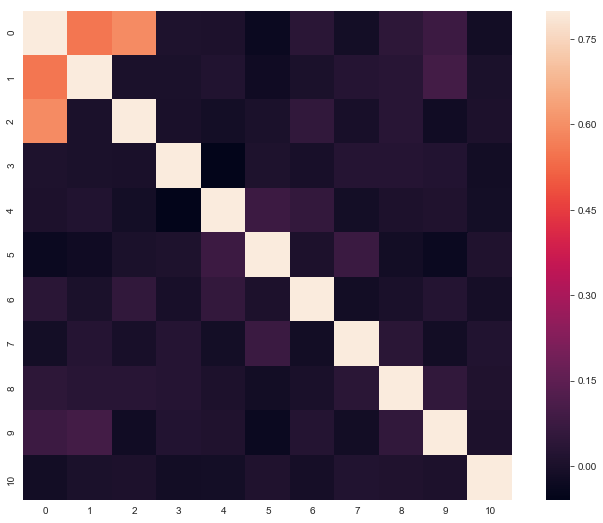

In [11]:
# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat2 = pd.DataFrame(np.insert(X, 0, y_altered, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

### Fit a linear model with multiple features, in this case 10, using new generated data

In [12]:
# Fit a linear model with all 10 features.
regr2 = linear_model.LinearRegression()
regr2.fit(X, y_altered)

# Save predicted values.
Y_pred_altered = regr2.predict(X)
print('new data R-squared regression:', regr.score(X, y_altered))


new data R-squared regression: -4.91236459213


### R-Squared is a way of measuring how much better than the mean line you have done based on summed squared error. 
### Now SS Regression and SS Total are both sums of squared terms. Both of those are always positive. This means we are taking 1, and subtracting a positive value. So the maximum R-Squared value is positive 1, but the minimum is negative infinity. Yes, that is correct, the range of R-squared is between -infinity and 1, not -1 and 1 and not 0 and 1

### Now, Fitting a linear model with Partial Least Squares Regression, reducing 10 features to 3, in this example, with the new altered data.

In [13]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1_altered = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1_altered.fit(X, y_altered)

# Save predicted values.
Y_PLS_pred_altered = pls1_altered.predict(X)
print('R-squared PLSR with the altered data:', pls1_altered.score(X, y_altered))

R-squared PLSR with the altered data: 0.661679075177


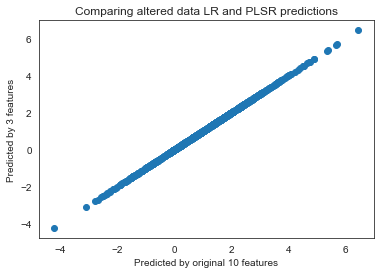

In [14]:
# Compare the predictions of the two models
plt.scatter(Y_pred_altered,Y_PLS_pred_altered) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing altered data LR and PLSR predictions')
plt.show()